<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch5_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats

Mount Drive (replace by access to Github)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Data

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainnumeric.xlsx')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainclean.xlsx')

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/CRMclean.xlsx', sheet_name="Sheet1")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


## Pie Chart

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df['Q2'] = df['Q2'].astype('category')
cat = df["Q2"].cat.categories
cat_Q2 = list(cat)
cat_Q2

['Full Time', 'Part Time']

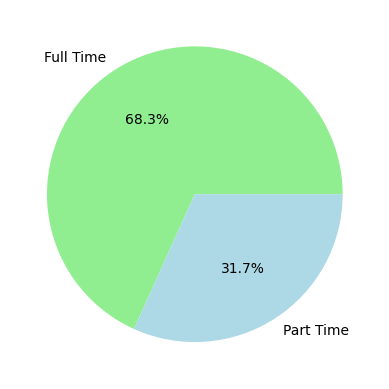

In [ ]:
plt.pie(x=df.value_counts("Q2"), labels=cat_Q2,  autopct="%1.1f%%",
        colors =["lightgreen", "lightblue"])
plt.show()

Adding your own labels (be careful they are in the right order)

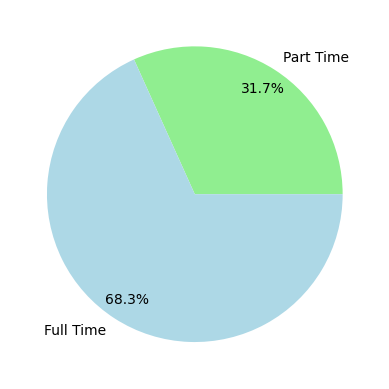

In [ ]:
plt.pie(x=df2.value_counts("Q2").sort_index(), labels=["Part Time", "Full Time"],
        autopct="%1.1f%%", colors =["lightgreen", "lightblue"],
        pctdistance=0.85)
plt.show()

## Donut

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df2['Q1'] = df2['Q1'].astype('category')
cat = df2["Q1"].cat.categories
cat_Q1 = list(cat)
cat_Q1

[1, 2, 3, 5]

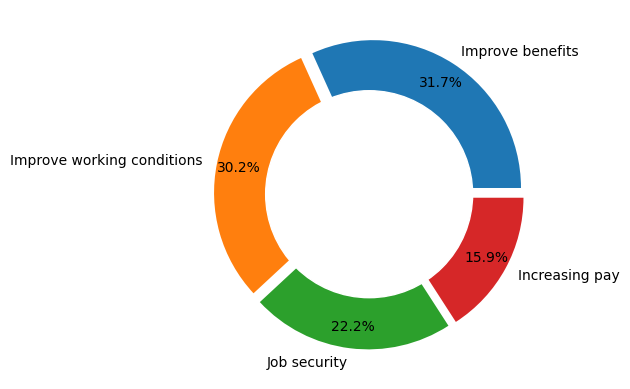

In [ ]:
plt.pie(x=df.value_counts("Q1"), labels=["Improve benefits", "Improve working conditions", "Job security", "Increasing pay"],  autopct="%1.1f%%",
       pctdistance=0.85,  explode=[0.05, 0.05, 0.05, 0.05])

centre_circle = plt.Circle( (0,0), 0.7, color='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

PRACTICE

Create Pie Chart and Donut for Q6

## Tree Map

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install squarify

In [ ]:
import squarify

Problematic Approach...

In [ ]:
df['Q4'] = df['Q4'].astype('category')
cat = df["Q4"].cat.categories
cat_Q4 = list(cat)
cat_Q4

['Additional funding for Counselling',
 'Coverage of hospital and doctors visits',
 'Dental',
 'Drug coverage',
 'Health spending account',
 'Massage',
 'Maternity Leave',
 'Wellness account',
 'greater coverage of orthodontics for family members',
 'maternity leave top up pay']

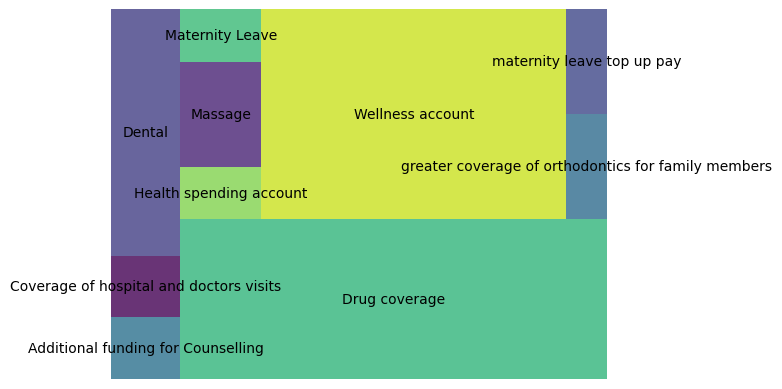

In [ ]:
squarify.plot(df.value_counts("Q4").sort_index(), label=cat_Q4, alpha=.8 )
plt.axis('off')
plt.show()

Better approach...

In [ ]:
df2.value_counts("Q4a").sort_index()

Q4a
1.0    15
2.0     1
3.0     2
5.0     4
6.0    16
7.0     5
dtype: int64

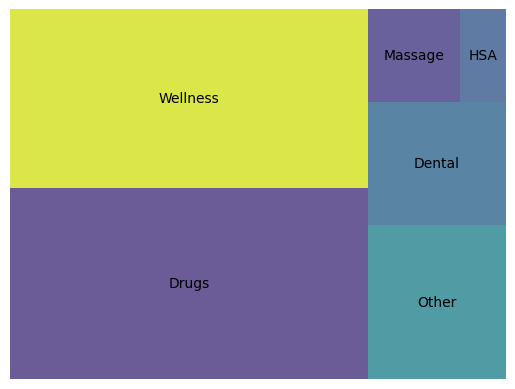

In [ ]:
squarify.plot(df2.value_counts("Q4a"), label=["Drugs", "Wellness", "Other", "Dental", "Massage", "HSA"], alpha=.8 )
plt.axis('off')
plt.show()

PRACTICE

Create a tree map for Q23

## Sunburst

In [ ]:
import plotly.express as px

In [ ]:
sumtable = df.groupby(["Q23", "Q1"])["Respondent"].count()
count_sum = sumtable.reset_index()

In [ ]:
count_sum

,Q23,Q1,Respondent
0,East,Improve benefits,6
1,East,Improve working conditions,5
2,East,Increasing pay,8
3,East,Job security,4
4,North,Improve benefits,6
5,North,Improve working conditions,3
6,North,Increasing pay,5
7,North,Job security,4
8,South,Improve benefits,2
9,South,Improve working conditions,11


In [ ]:
fig = px.sunburst(count_sum, path=['Q23', 'Q1'], values='Respondent',
                  height = 400)
fig.show()

## Stacked Bar Plot

In [ ]:
from pandas import crosstab
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
bar_13 = crosstab(index=df2['Q2'], columns= df2["Q13"], normalize="index")
bar_13

Q13,1,2,3,4,5
Q2,,,,,
1,0.150000,0.400000,0.300000,0.100000,0.050000
2,0.023256,0.116279,0.186047,0.581395,0.093023


In [ ]:
gp = ["Part Time", "Full Time"]
bar_13["Workload"] = gp
bar_13

Q13,1,2,3,4,5,Workload
Q2,,,,,,
1,0.150000,0.400000,0.300000,0.100000,0.050000,Part Time
2,0.023256,0.116279,0.186047,0.581395,0.093023,Full Time


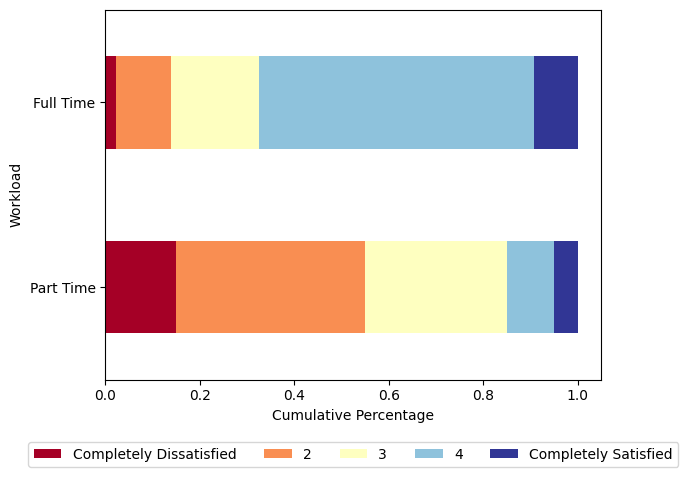

In [ ]:

bar_13.plot("Workload", kind='barh', stacked=True, colormap='RdYlBu')
plt.xlabel("Cumulative Percentage")
plt.legend(["Completely Dissatisfied", "2", "3", "4", "Completely Satisfied"], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.show()

## Column Chart

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
col_Q1 = df.value_counts("Q1").sort_index()

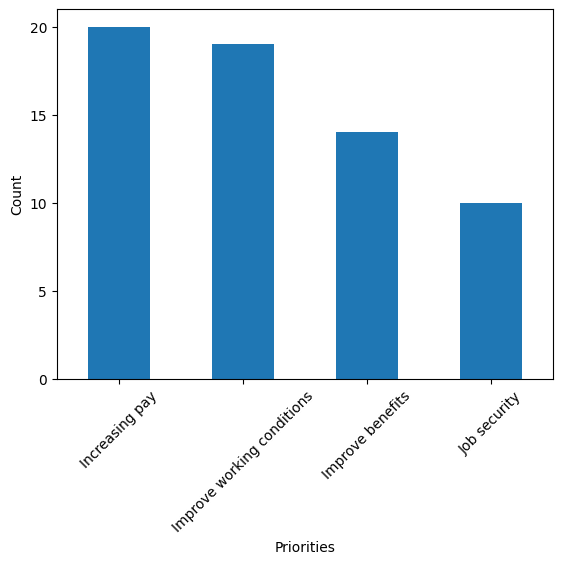

In [ ]:
col_Q1.plot(kind='bar')
plt.xlabel('Priorities')
plt.ylabel('Count')
plt.yticks(np.arange(0, 25, step=5))
plt.xticks(rotation = 45)
plt.show()

## Bar Graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
col_Q4a = df2.value_counts("Q4a").sort_index()
col_Q4a

Q4a
1.0    15
2.0     1
3.0     2
5.0     4
6.0    16
7.0     5
dtype: int64

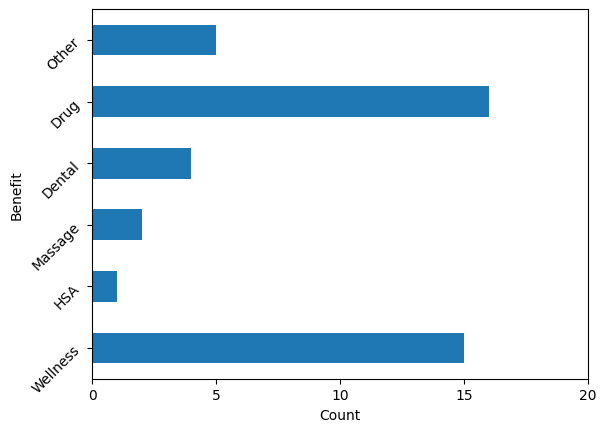

In [ ]:
col_Q4a.plot(kind='barh')
plt.ylabel('Benefit')
plt.xlabel('Count')
plt.xticks(np.arange(0, 25, step=5))
plt.yticks([0, 1, 2, 3, 4, 5],["Wellness", "HSA", "Massage", "Dental", "Drug", "Other"], rotation = 45)
plt.show()

## Waffle (Unit) Chart

In [ ]:
!pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 37.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [ ]:
VC_Q23 = df2.value_counts("Q23").sort_index()

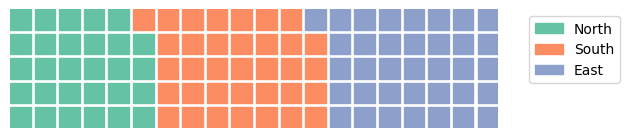

In [ ]:
data = {'North': VC_Q23[1], 'South': VC_Q23[2], 'East': VC_Q23[3]}
plt.figure(
FigureClass=Waffle,
  rows=5,
  columns=20,
  values=data,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

Waffle chart for each location

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [ ]:
VC_Q7a = df2[df2["Q23"]==1]
VC_Q7b = df2[df2["Q23"]==2]
VC_Q7c = df2[df2["Q23"]==3]

In [ ]:
VC_Q7a_Q23 = VC_Q7a.value_counts("Q7").sort_index()
Per_Q7a_Q23 = 100 /sum(VC_Q7a_Q23) * VC_Q7a_Q23
Per_Q7a_Q23

Q7
1    50.0
2    50.0
dtype: float64

In [ ]:
VC_Q7b_Q23 = VC_Q7b.value_counts("Q7").sort_index()
Per_Q7b_Q23 = 100 /sum(VC_Q7b_Q23) * VC_Q7b_Q23
Per_Q7b_Q23

Q7
1    18.181818
2    81.818182
dtype: float64

In [ ]:
VC_Q7c_Q23 = VC_Q7c.value_counts("Q7").sort_index()
Per_Q7c_Q23 = 100 /sum(VC_Q7c_Q23) * VC_Q7c_Q23
Per_Q7c_Q23

Q7
1    30.434783
2    65.217391
3     4.347826
dtype: float64

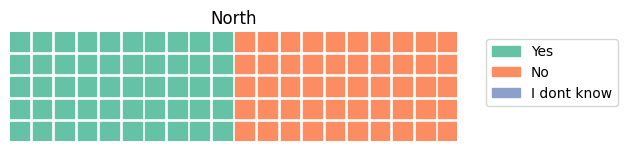

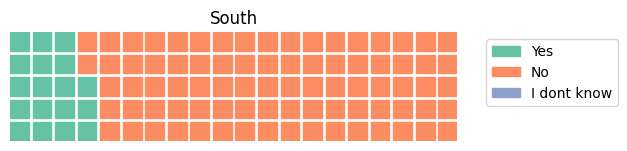

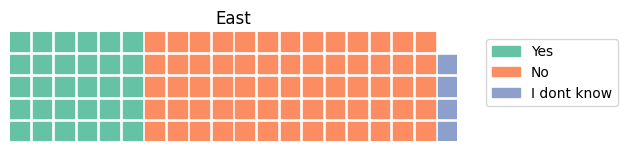

In [ ]:
data1 = {'Yes': Per_Q7a_Q23[1], 'No': Per_Q7a_Q23[2], 'I dont know': 0}
data2 = {'Yes': Per_Q7b_Q23[1], 'No': Per_Q7b_Q23[2], 'I dont know': 0}
data3 = {'Yes': Per_Q7c_Q23[1], 'No': Per_Q7c_Q23[2], 'I dont know': Per_Q7c_Q23[3]}

plt.figure(
FigureClass=Waffle,
  rows=5,
  columns=20,
  values=data1,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.gca().set_title('North')

plt.figure(
FigureClass=Waffle,
  rows=5,
  columns=20,
  values=data2,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.gca().set_title('South')

plt.figure(
FigureClass=Waffle,
  rows=5,
  columns=20,
  values=data3,
 legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.gca().set_title('East')

plt.show()

## Spider (Radar) Chart

In [ ]:
import plotly.graph_objects as go

In [ ]:
spi = df2[["Q23","Q13", "Q14", "Q15", "Q18", "Q20"]].copy()
spi.head(8)

,Q23,Q13,Q14,Q15,Q18,Q20
0,3,4,4,4,4,4
1,1,3,1,2,3,4
2,1,1,3,3,3,5
3,3,5,4,2,4,4
4,2,2,2,2,2,2
5,1,1,4,4,4,4
6,1,5,4,4,4,4
7,3,5,3,3,4,3


In [ ]:
P3=spi.loc[0]
P3[1:6]

Q13    4
Q14    4
Q15    4
Q18    4
Q20    4
Name: 0, dtype: int64

In [ ]:
P1=spi.loc[1]
P1[1:6]

Q13    3
Q14    1
Q15    2
Q18    3
Q20    4
Name: 1, dtype: int64

In [ ]:
P2=spi.loc[4]
P2[1:6]

Q13    2
Q14    2
Q15    2
Q18    2
Q20    2
Name: 4, dtype: int64

In [ ]:
cat = ["Hours worked","Time of Day", "Location",
              "Safety", "Inclusivity"]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= P1[1:6],
      theta=cat,
      fill='toself',
      name='Person 1'
))
fig.add_trace(go.Scatterpolar(
      r=P2[1:6],
      theta=cat,
      fill='toself',
      name='Person 2'
))

fig.add_trace(go.Scatterpolar(
      r=P3[1:6],
      theta=cat,
      fill='toself',
      name='Person 3'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

Spider Chart for each location

In [ ]:
spiN = spi[spi["Q23"]==1]
spiS = spi[spi["Q23"]==2]
spiE = spi[spi["Q23"]==3]

In [ ]:
cat = ["Hours worked","Time of Day", "Location",
              "Safety", "Inclusivity"]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= spiN.mean(),
      theta=cat,
      fill="toself",
      name="North Avg"
))

fig.add_trace(go.Scatterpolar(
      r=spiE.mean(),
      theta=cat,
      fill="toself",
      name="East Avg"
))

fig.add_trace(go.Scatterpolar(
      r=spiS.mean(),
      theta=cat,
      fill="toself",
      name="South Avg"
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

In [ ]:
cat = ["Hours worked","Time of Day", "Location",
              "Safety", "Inclusivity"]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= spiN.median(),
      theta=cat,
      fill="toself",
      name="North Avg"
))

fig.add_trace(go.Scatterpolar(
      r=spiE.median(),
      theta=cat,
      fill="toself",
      name="East Avg"
))

fig.add_trace(go.Scatterpolar(
      r=spiS.median(),
      theta=cat,
      fill="toself",
      name="South Avg"
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

## Dot Plot

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
sumtable = df2.groupby(["Q23", "Q2"])["Q24"].mean()
count_sum = sumtable.reset_index()

In [ ]:
count_sum

,Q23,Q2,Q24
0,1,1,2.571429
1,1,2,13.700000
2,2,1,1.750000
3,2,2,9.611111
4,3,1,1.750000
5,3,2,11.400000


In [ ]:
count_sum["Q23"].replace({1 : "North", 2 : "South",  3 : "East"}, inplace=True)

In [ ]:
count_sum["Q2"].replace({1 : "Part Time", 2 : "Full Time"}, inplace=True)

In [ ]:
count_sum

,Q23,Q2,Q24
0,North,Part Time,2.571429
1,North,Full Time,13.700000
2,South,Part Time,1.750000
3,South,Full Time,9.611111
4,East,Part Time,1.750000
5,East,Full Time,11.400000


In [ ]:
fig = px.scatter(count_sum, y="Q23", x="Q24", color="Q2", symbol="Q2")
fig.update_traces(marker_size=10)
fig.update_layout(xaxis_title="Years at Company", yaxis_title="Location", legend_title="Workload")
fig.show()

## Line Graph

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df3_Q8a =df3[df3['Q1'] == "Zhao"]
df3_Q8b =df3[df3['Q1'] == "Taylor"]
df3_Q8c =df3[df3['Q1'] == "Garcia"]

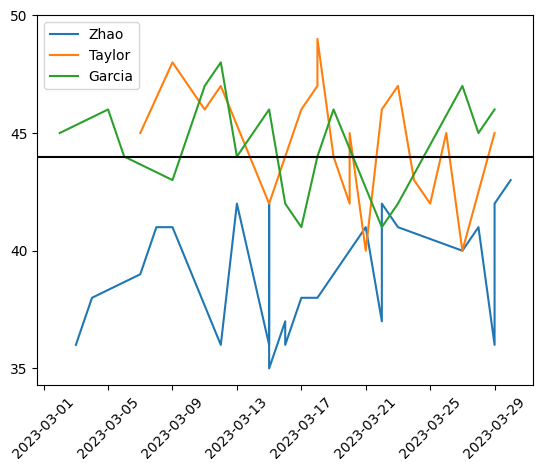

In [ ]:
plt.plot(df3_Q8a["Q5"], df3_Q8a["Q8"])
plt.plot(df3_Q8b["Q5"], df3_Q8b["Q8"])
plt.plot(df3_Q8c["Q5"], df3_Q8c["Q8"])
plt.axhline(y=44, color='black', linestyle='-')
plt.legend(["Zhao", "Taylor", "Garcia"])
plt.yticks(np.arange(35, 55, step=5))
plt.xticks(rotation = 45)
plt.show()

## Stacked Column Chart

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df3_css = df3[["Q6", "Q16", "Q26"]].copy()
css = df3_css.apply(pd.Series.value_counts).reset_index()
stage = css["index"]
css

,index,Q6,Q16,Q26
0,Contacted,61.0,64.0,38.0
1,Demo,23.0,24.0,26.0
2,Lost,NaN,4.0,10.0
3,Negotiations,10.0,14.0,19.0
4,Proposal,18.0,25.0,32.0
5,Qualified,23.0,NaN,NaN
6,Won,NaN,4.0,9.0


In [ ]:
scc = css.T.tail(-1).reset_index()
scc

,index,0,1,2,3,4,5,6
0,Q6,61.0,23.0,NaN,10.0,18.0,23.0,NaN
1,Q16,64.0,24.0,4.0,14.0,25.0,NaN,4.0
2,Q26,38.0,26.0,10.0,19.0,32.0,NaN,9.0


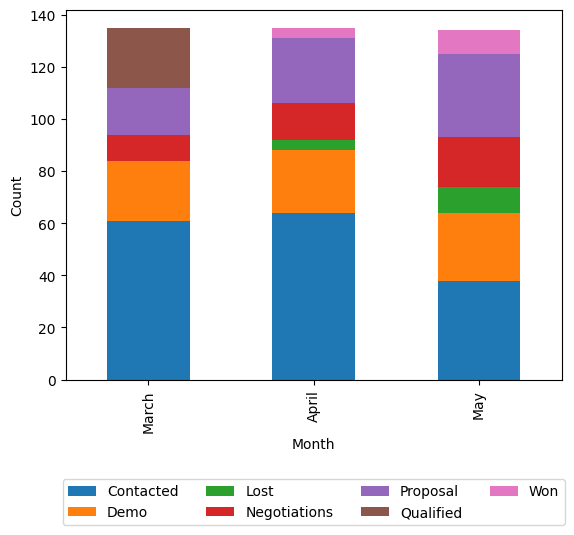

In [ ]:
scc.plot.bar(stacked=True)
plt.xticks([0,1,2], ["March", "April", "May"])
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(stage, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.show()

## Bump Chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df3_bump = df3[["Q1", "Q13", "Q23", "Q33"]].copy()

In [ ]:
df3_bump.head(5)

,Q1,Q13,Q23,Q33
0,Smith,At Churn Risk,Average,Average
1,Smith,Good,Good,Very Good
2,Garcia,Average,At Churn Risk,At Churn Risk
3,Chen,Average,Average,Good
4,Smith,Good,Very Good,Good


In [ ]:
df3_bump.replace({"At Churn Risk": 1, "Average": 2, "Good": 3, "Very Good": 4}, inplace=True)

In [ ]:
df3_bumpa =df3_bump[df3_bump['Q1'] == "Zhao"]
bumpa = df3_bumpa.T.tail(-1)
bumpa

,6,7,18,20,24,30,43,48,54,57,...,95,96,98,104,106,120,126,129,130,134
Q13,2,3,3,3,4,4,1,3,2,4,...,3,3,2,3,2,3,2,1,3,4
Q23,4.0,3.0,4.0,4.0,4.0,4.0,1.0,3.0,2.0,4.0,...,3.0,4.0,2.0,4.0,3.0,4.0,3.0,1.0,4.0,4.0
Q33,4.0,3.0,3.0,4.0,3.0,4.0,NaN,4.0,3.0,4.0,...,3.0,4.0,2.0,4.0,4.0,4.0,3.0,NaN,3.0,1.0


In [ ]:
time = ["March", "April", "May"]

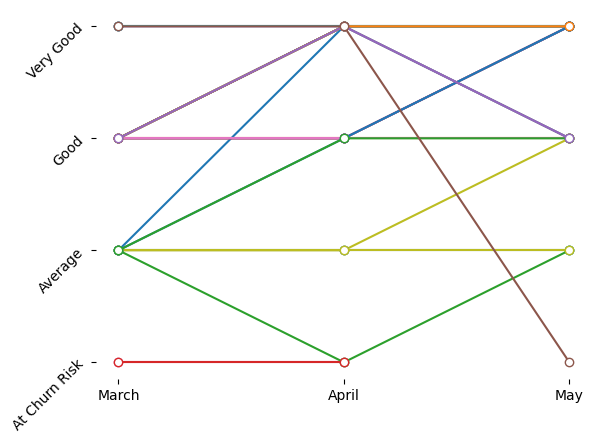

In [ ]:
fig, ax = plt.subplots()
for i in bumpa:
    ax.plot(time, np.array(bumpa[i]), "o-", markerfacecolor="white")
plt.yticks([1, 2, 3, 4],["At Churn Risk", "Average", "Good", "Very Good"], rotation = 45)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()

## Dot Plot

In [ ]:
import plotly.express as px
import pandas as pd

In [ ]:
sumtable = df3.groupby(["Q1"])["Q7"].mean()
avg_sum = sumtable.reset_index()
avg_dp = np.repeat(a="March", repeats=len(avg_sum["Q7"]))
avg_sum["Time"] = avg_dp
avg_sum

,Q1,Q7,Time
0,Chen,39.333333,March
1,Devi,43.750000,March
2,Garcia,42.882353,March
3,Mensah,38.769231,March
4,Smith,37.400000,March
5,Taylor,29.736842,March
6,Zhao,34.500000,March


In [ ]:
sumtable2 = df3.groupby(["Q1"])["Q27"].mean()
avg_sum2 = sumtable2.reset_index()
avg_dp2 = np.repeat(a="May", repeats=len(count_sum["Q27"]))
avg_sum2["Time"] = avg_dp2
avg_sum2 = avg_sum2.rename(columns = {"Q27": "Q7"})
avg_sum2

,Q1,Q7,Time
0,Chen,44.071429,May
1,Devi,45.909091,May
2,Garcia,46.294118,May
3,Mensah,40.600000,May
4,Smith,44.000000,May
5,Taylor,36.941176,May
6,Zhao,42.583333,May


In [ ]:
dp_q7q27 = pd.concat([avg_sum, avg_sum2])
dp_q7q27

,Q1,Q7,Time
0,Chen,39.333333,March
1,Devi,43.750000,March
2,Garcia,42.882353,March
3,Mensah,38.769231,March
4,Smith,37.400000,March
5,Taylor,29.736842,March
6,Zhao,34.500000,March
0,Chen,44.071429,May
1,Devi,45.909091,May
2,Garcia,46.294118,May


In [ ]:
fig = px.scatter(dp_q7q27, x="Q7", y="Q1", color="Time", symbol="Time")
fig.update_traces(marker_size=10)
fig.update_layout(xaxis_title="Average Listening Percentage", yaxis_title="Salesperson", legend_title="Month")
fig.show()

## Histogram

In [ ]:
import seaborn as sns

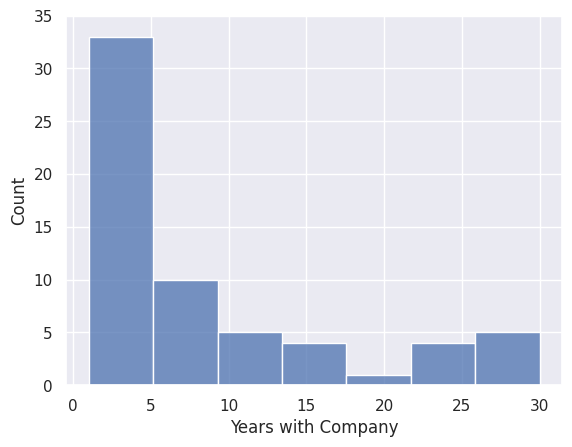

In [ ]:
fig = sns.histplot(df2["Q24"])
plt.yticks(np.arange(0, 40, step=5))
plt.xlabel('Years with Company')
plt.show()

## Density

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
densPT = df2[df2["Q2"]==1]
densFT = df2[df2["Q2"]==2]

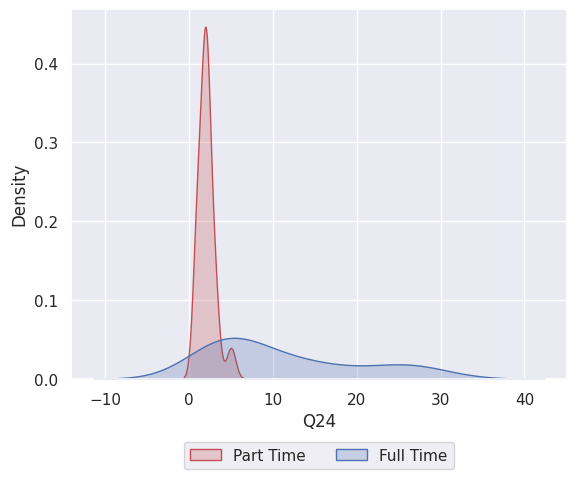

In [ ]:
sns.set(style="darkgrid")
fig = sns.kdeplot(densPT["Q24"], fill=True, color="r")
fig = sns.kdeplot(densFT["Q24"], fill=True, color="b")
plt.legend(["Part Time", "Full Time"], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.show()

## Violin Plot

In [ ]:
from seaborn import violinplot
import matplotlib.pyplot as plt

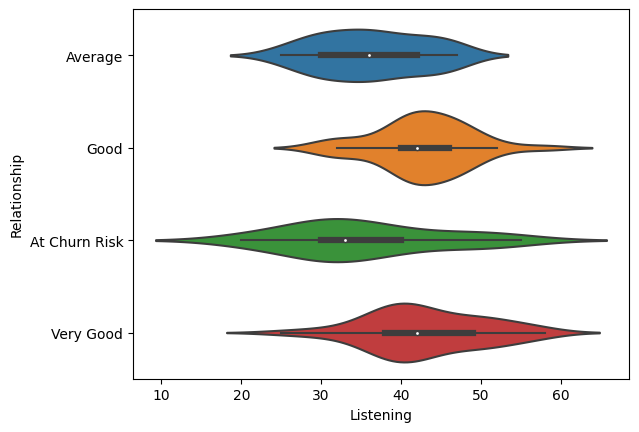

In [ ]:
violinplot(data=df3, x="Q17", y="Q23")
plt.ylabel('Relationship')
plt.xlabel('Listening')
plt.show()

## Boxplot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

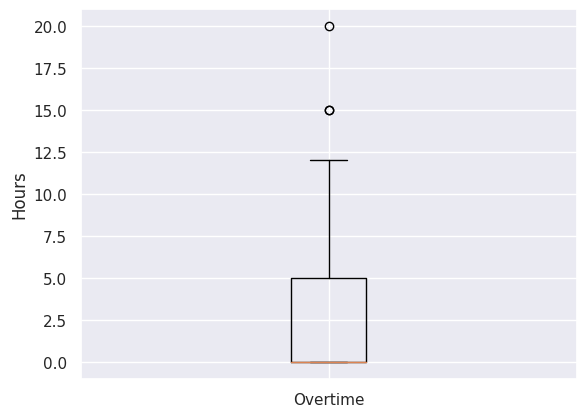

In [ ]:
plt.boxplot(df2.dropna()["Q17"])
plt.ylabel('Hours')
plt.xticks([1],["Overtime"])
plt.show()

Multiple boxplots

In [ ]:
import seaborn as sns

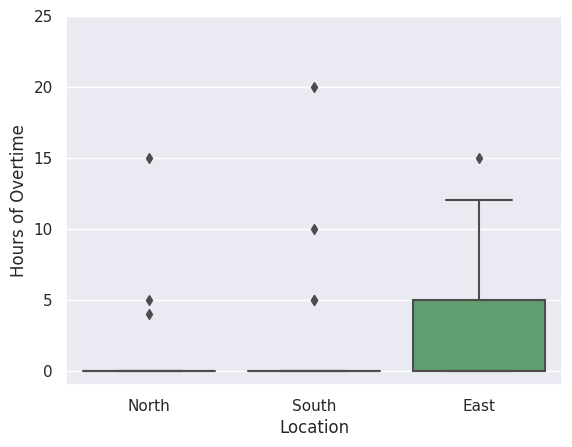

In [ ]:
fig = sns.boxplot( x=df2["Q23"], y=df2["Q17"] )
plt.yticks(np.arange(0, 30, step=5))
plt.xlabel('Location')
plt.ylabel('Hours of Overtime')
plt.xticks([0, 1, 2],["North", "South", "East"])
plt.show()

## Bee Swarm

In [ ]:
from seaborn import swarmplot
import matplotlib.pyplot as plt

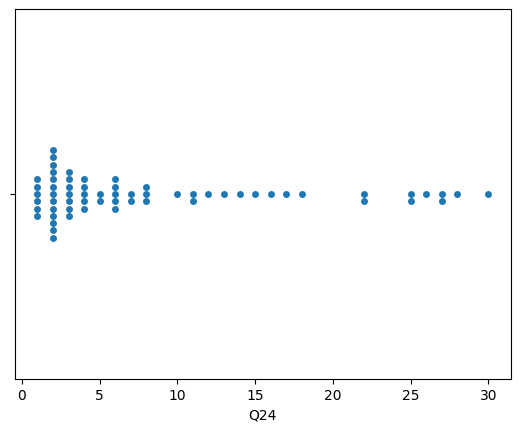

In [ ]:
swarmplot(data=df2, x="Q24")
plt.show()

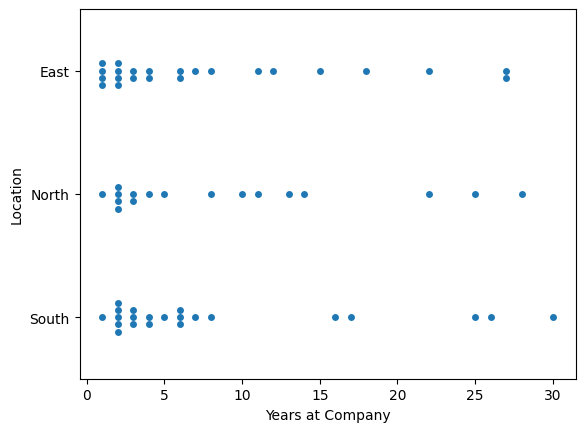

In [ ]:
from seaborn import swarmplot
import matplotlib.pyplot as plt
swarmplot(data=df, x="Q24", y="Q23")
plt.xlabel('Years at Company')
plt.ylabel('Location')
plt.show()

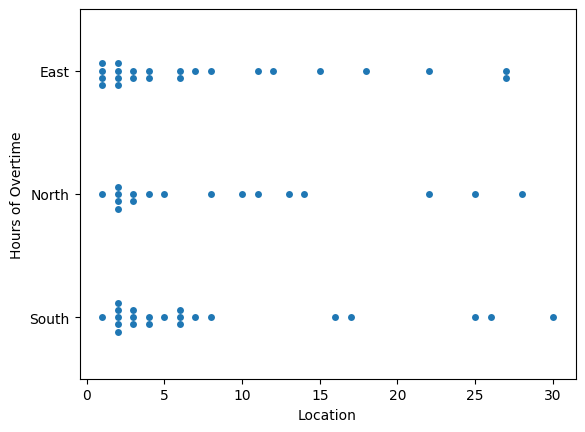

In [ ]:
bs=df2
bs["Q23"].replace({1 : "North", 2 : "South",  3 : "East"}, inplace=True)

from seaborn import swarmplot
import matplotlib.pyplot as plt

swarmplot(data=bs, x="Q24", y="Q23")
plt.xlabel('Location')
plt.ylabel('Hours of Overtime')
plt.show()

## Scatterplot

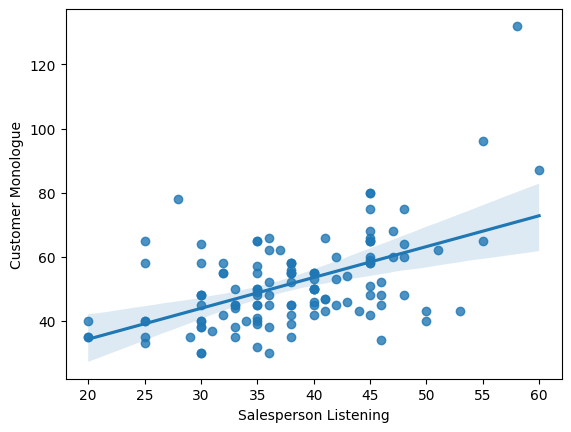

In [ ]:
import matplotlib.pyplot as plt
from seaborn import regplot

regplot(x=df3.dropna()["Q7"], y=df3.dropna()["Q10"])
plt.xlabel('Salesperson Listening')
plt.ylabel('Customer Monologue')
plt.show()

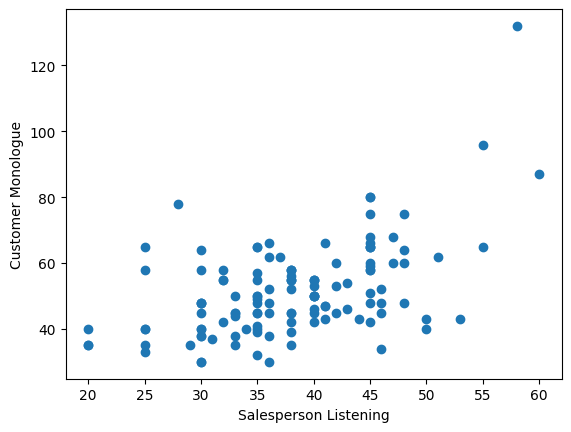

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df3.dropna()["Q7"], df3.dropna()["Q10"], linestyle="none", marker='o')
plt.xlabel('Salesperson Listening')
plt.ylabel('Customer Monologue')
plt.show()

## Bubble Chart

In [ ]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

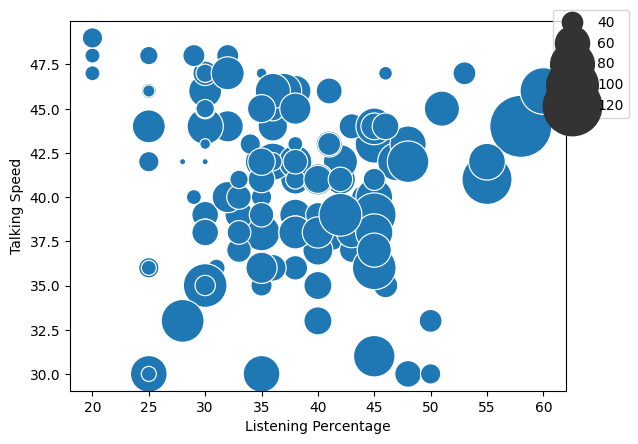

In [ ]:
scatterplot(data=df3, x="Q7", y="Q8", size="Q10", legend=True, sizes=(20, 2000))
plt.xlabel("Listening Percentage")
plt.ylabel("Talking Speed")
plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1.05), ncol=1)
plt.show()